<a href="https://colab.research.google.com/github/kyashasri/Sales-forecasting/blob/main/Chocolates(weekly).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading Dataset
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Chocolate Sales.csv')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [2]:
#Removing $ and , from Amounts section
df['Amount']=df['Amount'].replace('[\$]','',regex=True)
df['Amount']=df['Amount'].replace(',','',regex=True)

df['Amount'].isna().sum()

np.int64(0)

In [3]:
#Converting Amount datatype object -> numeric
df['Amount']=pd.to_numeric(df['Amount'],errors='coerce')

In [4]:
# Checking for nulls
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


In [5]:
#converting datatype of date
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-5-2911974148>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [6]:
#Sorting dates
df=df.sort_values('Date')

In [7]:
# Adding month,year,weekday columns
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Month', 'Year'],
      dtype='object')

In [8]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year
253,Marney O'Breen,Australia,Smooth Sliky Salty,2022-01-03,3745,170,1,2022
89,Andria Kimpton,Canada,Caramel Stuffed Bars,2022-01-03,7154,348,1,2022
398,Marney O'Breen,Canada,Spicy Special Slims,2022-01-03,3528,336,1,2022
428,Ches Bonnell,UK,White Choc,2022-01-03,3269,226,1,2022
187,Dotty Strutley,UK,99% Dark & Pure,2022-01-03,9310,282,1,2022


In [9]:
# Setting Date section as index
df.set_index('Date',inplace=True)

df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Month,Year
Date,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,3745,170,1,2022
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,7154,348,1,2022
2022-01-03,Marney O'Breen,Canada,Spicy Special Slims,3528,336,1,2022
2022-01-03,Ches Bonnell,UK,White Choc,3269,226,1,2022
2022-01-03,Dotty Strutley,UK,99% Dark & Pure,9310,282,1,2022


In [10]:
df['Month'].value_counts().sort_index()

,count
Month,
1,154
2,110
3,131
4,118
5,135
6,163
7,149
8,134


In [11]:
#Grouped by Country,Product,Year and Month
grouped_date = df.groupby([ 'Product', 'Date'])[['Amount', 'Boxes Shipped']].sum().reset_index()
grouped_date = grouped_date.sort_values(by=['Product', 'Date']).reset_index(drop=True)
grouped_date.head(20)

,Product,Date,Amount,Boxes Shipped
0,50% Dark Bites,2022-01-04,3024,23
1,50% Dark Bites,2022-01-12,5250,293
2,50% Dark Bites,2022-01-13,11844,281
3,50% Dark Bites,2022-01-14,5194,418
4,50% Dark Bites,2022-01-17,6678,708
5,50% Dark Bites,2022-01-27,9765,85
6,50% Dark Bites,2022-01-28,581,65
7,50% Dark Bites,2022-01-31,13482,15
8,50% Dark Bites,2022-02-09,2499,271
9,50% Dark Bites,2022-02-11,10458,316


In [12]:
# Step 1: Ensure 'Date' is datetime type
grouped_date['Date'] = pd.to_datetime(grouped_date['Date'])

# Step 2: Set 'Date' as index
grouped_date = grouped_date.set_index('Date')

# Step 3: Group by 'Product' and resample weekly (weeks starting on Monday)
weekly = (
    grouped_date.groupby('Product')
                .resample('W-MON')[['Amount', 'Boxes Shipped']]
                .sum()
                .reset_index()
)

# Step 4: Sort (optional)
weekly = weekly.sort_values(by=['Product', 'Date']).reset_index(drop=True)

# Show result
weekly.head(10)


,Product,Date,Amount,Boxes Shipped
0,50% Dark Bites,2022-01-10,3024,23
1,50% Dark Bites,2022-01-17,28966,1700
2,50% Dark Bites,2022-01-24,0,0
3,50% Dark Bites,2022-01-31,23828,165
4,50% Dark Bites,2022-02-07,0,0
5,50% Dark Bites,2022-02-14,12957,587
6,50% Dark Bites,2022-02-21,18795,234
7,50% Dark Bites,2022-02-28,0,0
8,50% Dark Bites,2022-03-07,24332,418
9,50% Dark Bites,2022-03-14,11711,154


In [13]:
weekly_small = weekly[['Date', 'Product', 'Amount']].copy()

# Replace zeros with NaN (only in Amount)
weekly_small['Amount'] = weekly_small['Amount'].replace(0, np.nan)

# Sort by Product and Date
weekly_small = weekly_small.sort_values(['Product', 'Date']).reset_index(drop=True)

# Interpolate per product
def interpolate_amount(group):
    group['Amount'] = group['Amount'].interpolate(method='linear', limit_direction='both')
    return group

interpolated = weekly_small.groupby('Product').apply(interpolate_amount).reset_index(drop=True)

print(interpolated)


          Date         Product   Amount
0   2022-01-10  50% Dark Bites   3024.0
1   2022-01-17  50% Dark Bites  28966.0
2   2022-01-24  50% Dark Bites  26397.0
3   2022-01-31  50% Dark Bites  23828.0
4   2022-02-07  50% Dark Bites  18392.5
..         ...             ...      ...
738 2022-08-01      White Choc   4291.0
739 2022-08-08      White Choc   7238.0
740 2022-08-15      White Choc  19887.0
741 2022-08-22      White Choc  25179.0
742 2022-08-29      White Choc  18186.0

[743 rows x 3 columns]


<ipython-input-13-2642235371>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  interpolated = weekly_small.groupby('Product').apply(interpolate_amount).reset_index(drop=True)


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Assuming 'weekly' DataFrame is already loaded

# 1. Prepare data: select columns & replace 0 with NaN
weekly_small = weekly[['Date', 'Product', 'Amount']].copy()
weekly_small['Amount'] = weekly_small['Amount'].replace(0, np.nan)

# 2. Outlier treatment using IQR capping per product
def remove_outliers_iqr(group):
    Q1 = group['Amount'].quantile(0.25)
    Q3 = group['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    group['Amount'] = np.where(group['Amount'] < lower_bound, lower_bound, group['Amount'])
    group['Amount'] = np.where(group['Amount'] > upper_bound, upper_bound, group['Amount'])
    return group

weekly_small = weekly_small.groupby('Product').apply(remove_outliers_iqr).reset_index(drop=True)

# 3. Optional: smoothing with rolling mean (window = 3)
def smooth_amount(group, window=3):
    group['Amount'] = group['Amount'].rolling(window, min_periods=1, center=True).mean()
    return group

weekly_small = weekly_small.groupby('Product').apply(smooth_amount).reset_index(drop=True)

# 4. Interpolation of missing values after outlier treatment & smoothing
weekly_small = weekly_small.sort_values(['Product', 'Date']).reset_index(drop=True)
def interpolate_amount(group):
    group['Amount'] = group['Amount'].interpolate(method='linear', limit_direction='both')
    return group

interpolated = weekly_small.groupby('Product').apply(interpolate_amount).reset_index(drop=True)

# 5. Sequence creation function for LSTM
def create_sequence(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# 6. MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# 7. Model evaluation setup
product_names = []
mape_values = []
mae_values = []
rmse_values = []
rmse_percent_values=[]
r2_values = []
actual_dict = {}
predicted_dict = []

products = interpolated['Product'].unique()
seq_length = 5

# 8. Loop through each product for model training and evaluation
for product in products:
    product_df = interpolated[interpolated['Product'] == product].sort_values(by='Date')
    product_df.set_index('Date', inplace=True)

    if len(product_df) < seq_length + 3:
        continue  # Skip if not enough data

    # Normalize Amount
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(product_df[['Amount']])

    # Create sequences
    X, y = create_sequence(scaled_data, seq_length)
    if len(X) == 0:
        continue

    # Train-test split (no shuffle for time series)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # LSTM Model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(64))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0, validation_data=(X_test, y_test))

    # Predict weekly values
    predicted_amounts = []
    actual_amounts = []
    for i in range(seq_length, len(scaled_data)):
        input_seq = scaled_data[i-seq_length:i].reshape(1, seq_length, 1)
        pred_scaled = model.predict(input_seq, verbose=0)
        pred = scaler.inverse_transform(pred_scaled)[0, 0]
        actual = scaler.inverse_transform(scaled_data[i].reshape(1, -1))[0, 0]
        predicted_amounts.append(pred)
        actual_amounts.append(actual)

    if len(predicted_amounts) == 0:
        continue

    # Error metrics
    actual_amounts_np = np.array(actual_amounts)
    predicted_amounts_np = np.array(predicted_amounts)

    mape = mean_absolute_percentage_error(actual_amounts_np, predicted_amounts_np)
    mae = mean_absolute_error(actual_amounts_np, predicted_amounts_np)
    rmse = np.sqrt(mean_squared_error(actual_amounts_np, predicted_amounts_np))
    rmse_percent = (rmse / np.mean(actual_amounts_np)) * 100
    r2 = r2_score(actual_amounts_np, predicted_amounts_np)

    # Store results
    mape_values.append(mape)
    mae_values.append(mae)
    rmse_values.append(rmse)
    rmse_percent_values.append(rmse_percent)
    r2_values.append(r2)
    product_names.append(product)
    actual_dict[product] = np.mean(actual_amounts_np)
    predicted_dict.append(np.mean(predicted_amounts_np))

# 9. Summary Results DataFrame
results_df = pd.DataFrame({
    'Product': product_names,
    'MAPE': mape_values,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'RMSE %': rmse_percent_values,
    'R2 Score': r2_values,
    'Actual Weekly Avg': [actual_dict[p] for p in product_names],
    'Predicted Weekly Avg': predicted_dict
})

print(results_df)

                 Product       MAPE          MAE         RMSE     RMSE %  \
0         50% Dark Bites  18.187787  2035.313746  2491.796717  19.813425   
1         70% Dark Bites  73.408055  2183.474884  2876.571101  38.580175   
2          85% Dark Bars  39.853790  4009.231349  5894.742904  46.643696   
3        99% Dark & Pure  40.791504  2127.517535  2611.551613  21.109403   
4            After Nines  33.735962  2234.646449  2605.706939  27.252429   
5           Almond Choco  32.460321  3032.348958  4639.020100  42.711703   
6    Baker's Choco Chips  39.779953  2671.712713  3800.969442  41.385924   
7   Caramel Stuffed Bars  15.007590  1307.005496  2007.610495  20.429428   
8   Choco Coated Almonds  18.867853  1770.052544  2671.203251  25.275017   
9          Drinking Coco  33.174207  3408.120026  4533.864575  36.116560   
10               Eclairs  44.132356  2735.617079  3580.467399  35.664710   
11      Fruit & Nut Bars  25.085358  1979.911895  2656.790457  30.625644   
12    Manuka

In [15]:
print(X.shape,y.shape)

(30, 5, 1) (30, 1)


In [16]:
import numpy as np

# Calculate average of actual values across all products
all_actual_means = list(actual_dict.values())
overall_actual_mean = np.mean(all_actual_means)

# Calculate average metrics
avg_mape = np.mean(mape_values)
avg_mae = np.mean(mae_values)
avg_rmse = np.mean(rmse_values)
avg_r2 = np.mean(r2_values)

# Calculate RMSE percentage relative to overall actual mean
avg_rmse_pct = (avg_rmse / overall_actual_mean) * 100

# Print with formatting
print("Average Model Performance Metrics Across All Products:")
print(f"MAPE      {avg_mape:.3f}")
print(f"MAE       {avg_mae:.3f}")
print(f"RMSE      {avg_rmse:.3f}")
print(f"RMSE %    {avg_rmse_pct:.3f}%")
print(f"R2 Score  {avg_r2:.3f}")


Average Model Performance Metrics Across All Products:
MAPE      36.462
MAE       2389.553
RMSE      3259.777
RMSE %    30.101%
R2 Score  0.607


In [20]:
import os

# --- Average Metrics Calculation ---
all_actual_means = list(actual_dict.values())
overall_actual_mean = np.mean(all_actual_means)

avg_mape = np.mean(mape_values)
avg_mae = np.mean(mae_values)
avg_rmse = np.mean(rmse_values)
avg_r2 = np.mean(r2_values)
avg_rmse_pct = (avg_rmse / overall_actual_mean) * 100

# --- Print to console ---
print("\nAverage Model Performance Metrics Across All Products:")
print(f"MAPE      {avg_mape:.3f}")
print(f"MAE       {avg_mae:.3f}")
print(f"RMSE      {avg_rmse:.3f}")
print(f"RMSE %    {avg_rmse_pct:.3f}%")
print(f"R2 Score  {avg_r2:.3f}")

# --- Save results_df and overall metrics ---
results_df.to_csv("product_wise_results.csv", index=False)

summary_df = pd.DataFrame({
    'Metric': ['MAPE', 'MAE', 'RMSE', 'RMSE %', 'R2 Score'],
    'Value': [avg_mape, avg_mae, avg_rmse, avg_rmse_pct, avg_r2]
})
summary_df.to_csv("overall_model_performance.csv", index=False)

# Optional: also save as text
with open("overall_model_performance.txt", "w") as f:
    f.write("Average Model Performance Metrics Across All Products:\n")
    f.write(f"MAPE      {avg_mape:.3f}\n")
    f.write(f"MAE       {avg_mae:.3f}\n")
    f.write(f"RMSE      {avg_rmse:.3f}\n")
    f.write(f"RMSE %    {avg_rmse_pct:.3f}%\n")
    f.write(f"R2 Score  {avg_r2:.3f}\n")

print("\nSaved: product_wise_results.csv, overall_model_performance.csv, and overall_model_performance.txt")



Average Model Performance Metrics Across All Products:
MAPE      36.462
MAE       2389.553
RMSE      3259.777
RMSE %    30.101%
R2 Score  0.607

Saved: product_wise_results.csv, overall_model_performance.csv, and overall_model_performance.txt


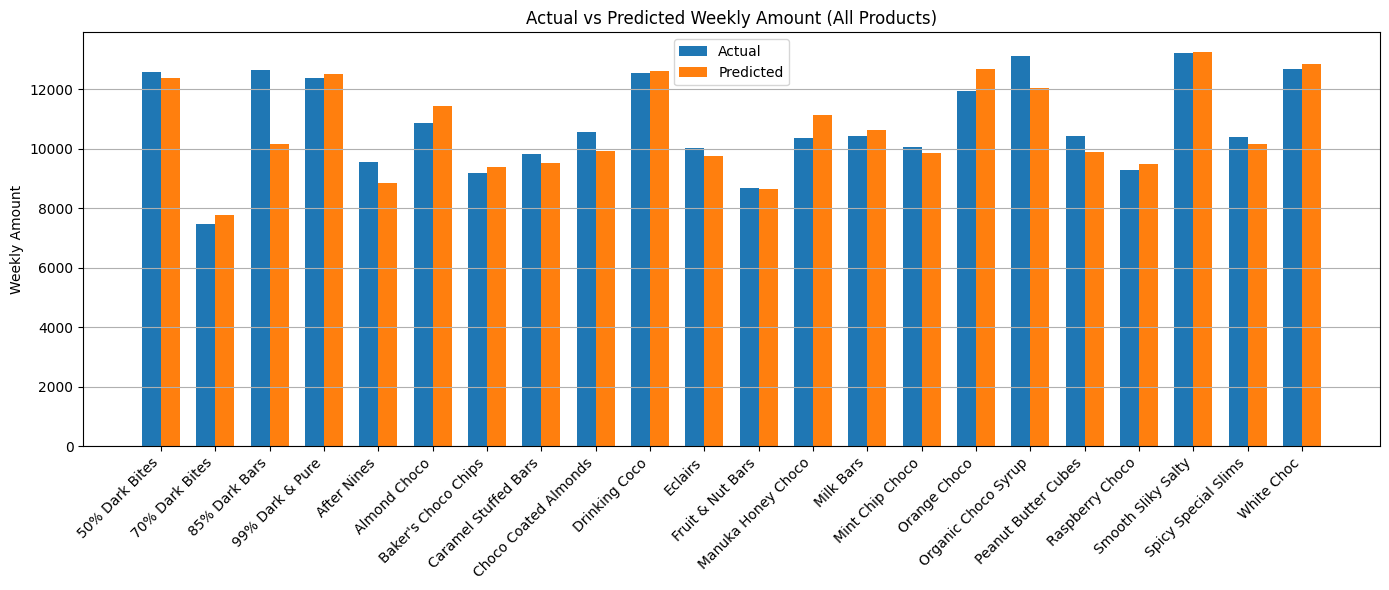

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values
product_names = results_df['Product'].tolist()
actual_values = results_df['Actual Weekly Avg'].tolist()
predicted_values = results_df['Predicted Weekly Avg'].tolist()
mape_values = results_df['MAPE'].tolist()

# Bar Plot: Actual vs Predicted Weekly Averages
x = np.arange(len(product_names))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width/2, actual_values, width, label='Actual')
ax.bar(x + width/2, predicted_values, width, label='Predicted')

ax.set_ylabel('Weekly Amount')
ax.set_title('Actual vs Predicted Weekly Amount (All Products)')
ax.set_xticks(x)
ax.set_xticklabels(product_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()




In [21]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Forecast settings
seq_length = 5
forecast_horizon = 2  # next 2 weeks

forecast_data = []

products = interpolated['Product'].unique()

for product in products:
    product_df = interpolated[interpolated['Product'] == product].sort_values('Date')
    product_df.set_index('Date', inplace=True)

    if len(product_df) < seq_length + forecast_horizon:
        continue

    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(product_df[['Amount']])

    # Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - seq_length):
        X.append(scaled_data[i:i+seq_length])
        y.append(scaled_data[i+seq_length])
    X, y = np.array(X), np.array(y)

    # Model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(80))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=50, batch_size=1, verbose=0)

    # Start forecasting
    input_seq = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    preds = []
    for _ in range(forecast_horizon):
        pred_scaled = model.predict(input_seq, verbose=0)
        pred_value = scaler.inverse_transform(pred_scaled)[0, 0]
        preds.append(pred_value)
        next_input = pred_scaled.reshape(1, 1, 1)
        input_seq = np.concatenate((input_seq[:, 1:, :], next_input), axis=1)

    forecast_data.append([product, preds[0], preds[1]])

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_data, columns=['Product', 'Week+1', 'Week+2'])

# Save to CSV (optional)
forecast_df.to_csv('forecast_next_2_weeks(1).csv', index=False)
print("✅ Forecasting complete and saved to 'forecast_next_2_weeks.csv'")


✅ Forecasting complete and saved to 'forecast_next_2_weeks.csv'


In [22]:
import pandas as pd
import plotly.graph_objects as go

# Load forecast data
forecast_df = pd.read_csv('forecast_next_2_weeks(1).csv')

# Plotly grouped bar chart
fig = go.Figure(data=[
    go.Bar(name='Week+1', x=forecast_df['Product'], y=forecast_df['Week+1']),
    go.Bar(name='Week+2', x=forecast_df['Product'], y=forecast_df['Week+2'])
])

fig.update_layout(
    title='Forecasted Sales for Next 2 Weeks (per Product)',
    xaxis_title='Product',
    yaxis_title='Predicted Amount',
    barmode='group',
    xaxis_tickangle=-45,
    template='plotly_white',  # White background
    height=600,
    yaxis_tickformat=',',     # Format y-axis with comma (e.g., 1,000)
    hoverlabel=dict(
        font_size=20 # Increased hover font size
    )
)

fig.show()


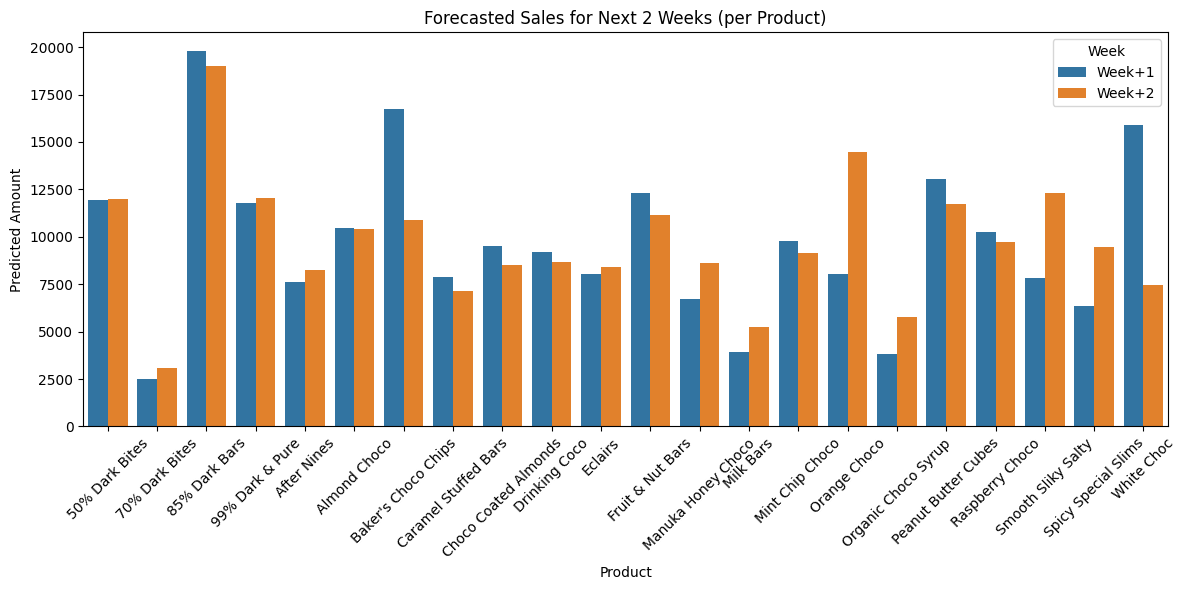

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
forecast_df = pd.read_csv('forecast_next_2_weeks(1).csv')

# Reshape the DataFrame to long format
long_df = forecast_df.melt(id_vars='Product',
                           value_vars=['Week+1', 'Week+2'],
                           var_name='Week',
                           value_name='Predicted Amount')

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x='Product', y='Predicted Amount', hue='Week')

plt.title('Forecasted Sales for Next 2 Weeks (per Product)')
plt.xlabel('Product')
plt.ylabel('Predicted Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
